<a href="https://colab.research.google.com/github/vitorlacerda2/Inc-ndios-no-Brasil/blob/main/Inc%C3%AAndios_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Os Incêndios Florestais no Território Brasileiro**


**Essa análise de dados busca nos ajudar a compreender melhor os dados das queimadas / incêndios que acontecem em todo o território brasileiro e com essa análise podemos fazer planos para ajudar a conter regiões que normalmente tem mais riscos de queimadas e assim as evitando.**

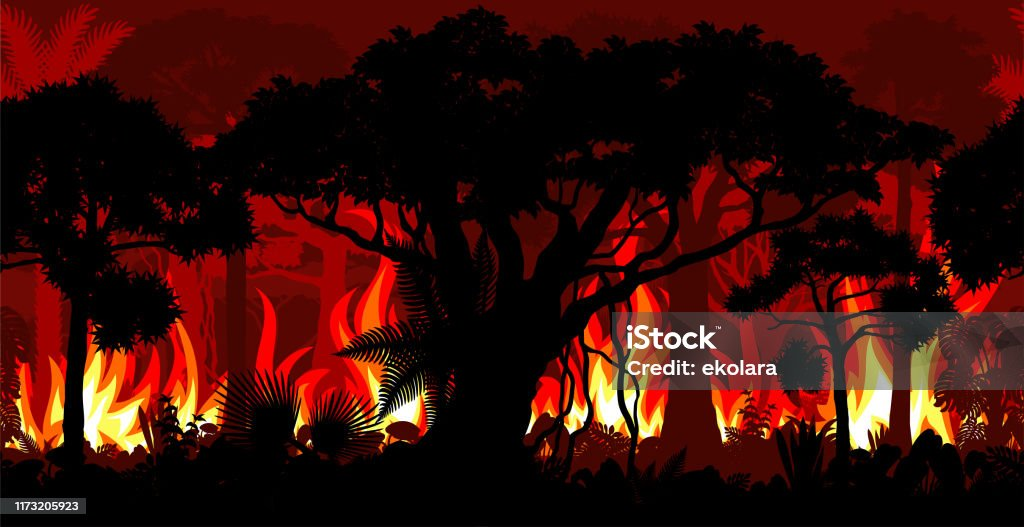

Abaixo está o link também contendo os dados dos incêndios em um arquivo csv:

[texto do link](https://)https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing

In [ ]:
#Aqui estou importando as bibliotecas que serão usadas :)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
Base_Dados = pd.read_csv('/content/Dados_Indendio.csv', encoding='latin-1')

In [ ]:
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
#Fazemos isso para poder verificar os dados que estiverem nulos
Base_Dados.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


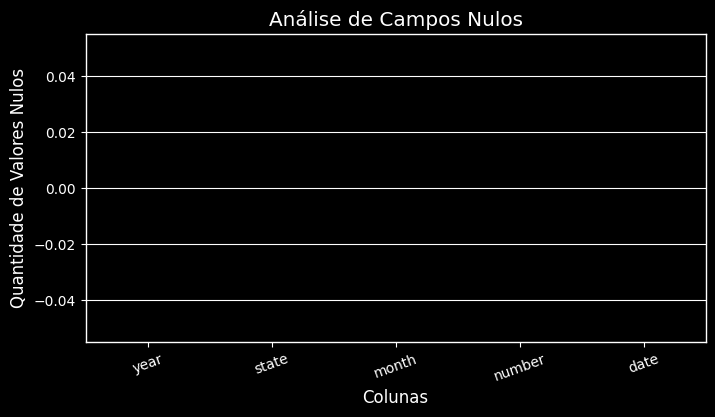

In [ ]:
null_counts = Base_Dados.isnull().sum()

plt.figure(figsize=(8, 4)) #Aqui eu arrumei o tamanho que eu queria o gráfico
plt.title('Análise de Campos Nulos')
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.xticks(rotation=20) #Aqui é a rotação dos nomes abaixo do gráfico
plt.ylabel('Quantidade de Valores Nulos')
plt.xlabel('Colunas')
plt.show()

In [ ]:
Base_Dados.nunique()

,0
year,20
state,23
month,12
number,1479
date,20


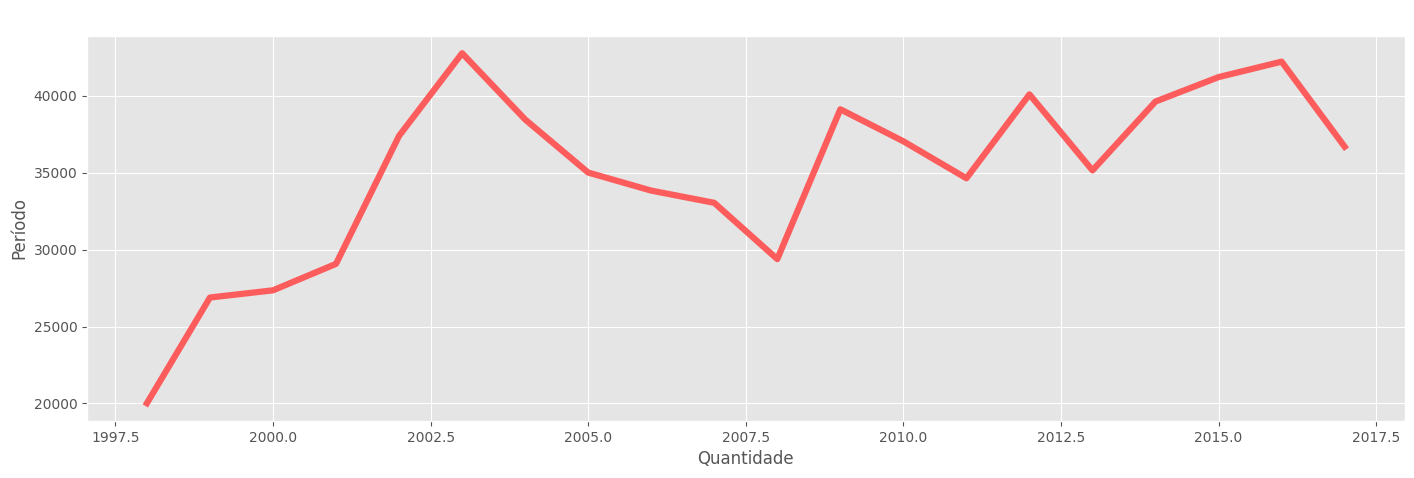

In [ ]:
Analise = Base_Dados.groupby( by=['year'] ).sum().reset_index()
Analise.head()


plt.figure( figsize=(17, 5) )
plt.style.use('ggplot')

plt.title('Gráfico com a Variação do Total de Indêncidios no Brasil entre 1997 a 2017:', loc='left', fontsize=16)
sns.lineplot( data=Analise, x='year', y='number', estimator='sum', lw=4.5, color='#ff5555', alpha=0.95 );

plt.xlabel('Quantidade')
plt.ylabel('Período');

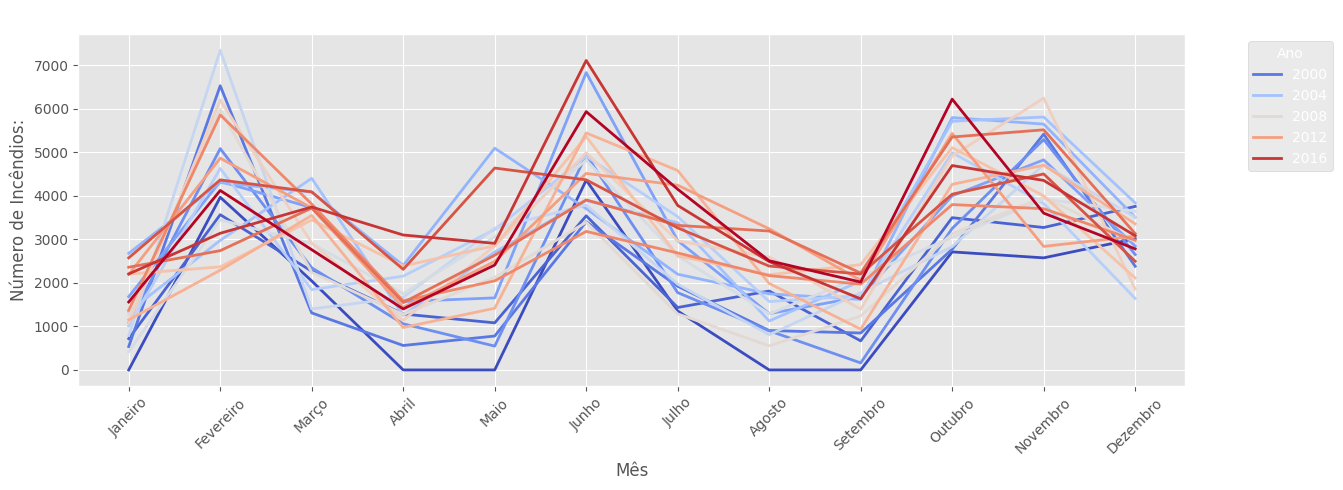

In [ ]:
Analise_02 = Base_Dados.groupby(by=['year', 'month']).sum().reset_index()

plt.figure(figsize=(13.5, 5))
plt.title('Os Números de Incêndios por Mês ao Longo dos Anos:', loc='left', fontsize=14.5)
sns.lineplot(data=Analise_02, x='month', y='number', hue='year', palette='coolwarm', linewidth=2)

plt.xlabel('Mês')
plt.ylabel('Número de Incêndios:')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(ticks=range(12), labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                                    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation=45)

plt.tight_layout()
plt.show()

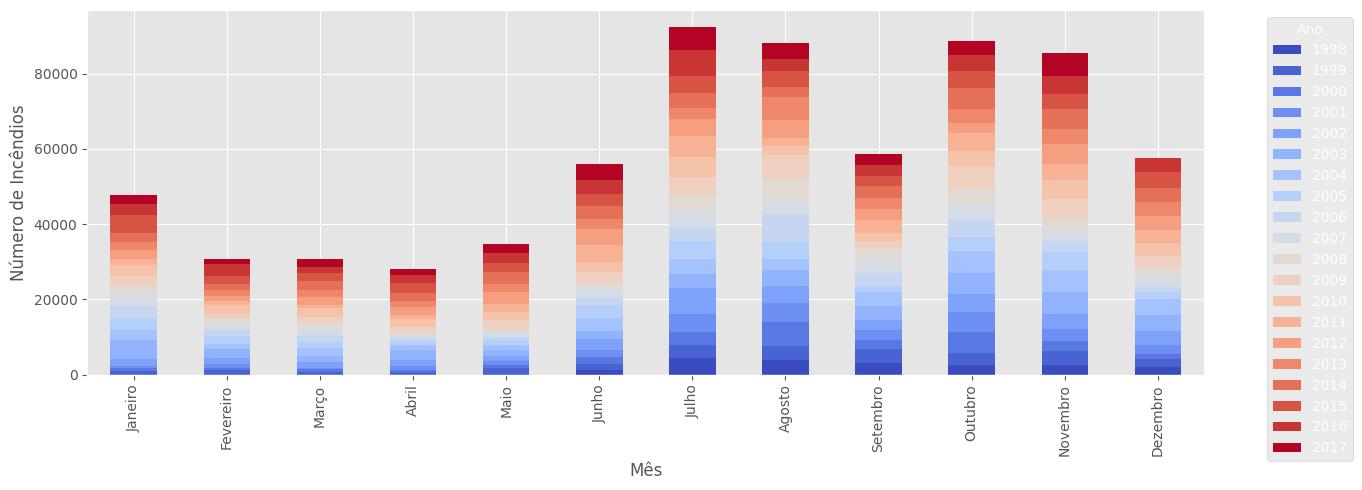

In [ ]:
pivot_table = Analise_02.pivot(index='month', columns='year', values='number')

pivot_table = pivot_table.reindex(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

pivot_table.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(13.7, 5))

plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Tem 2 tipos de graficos diferentes para uma melhor análise!

In [ ]:
!pip install squarify

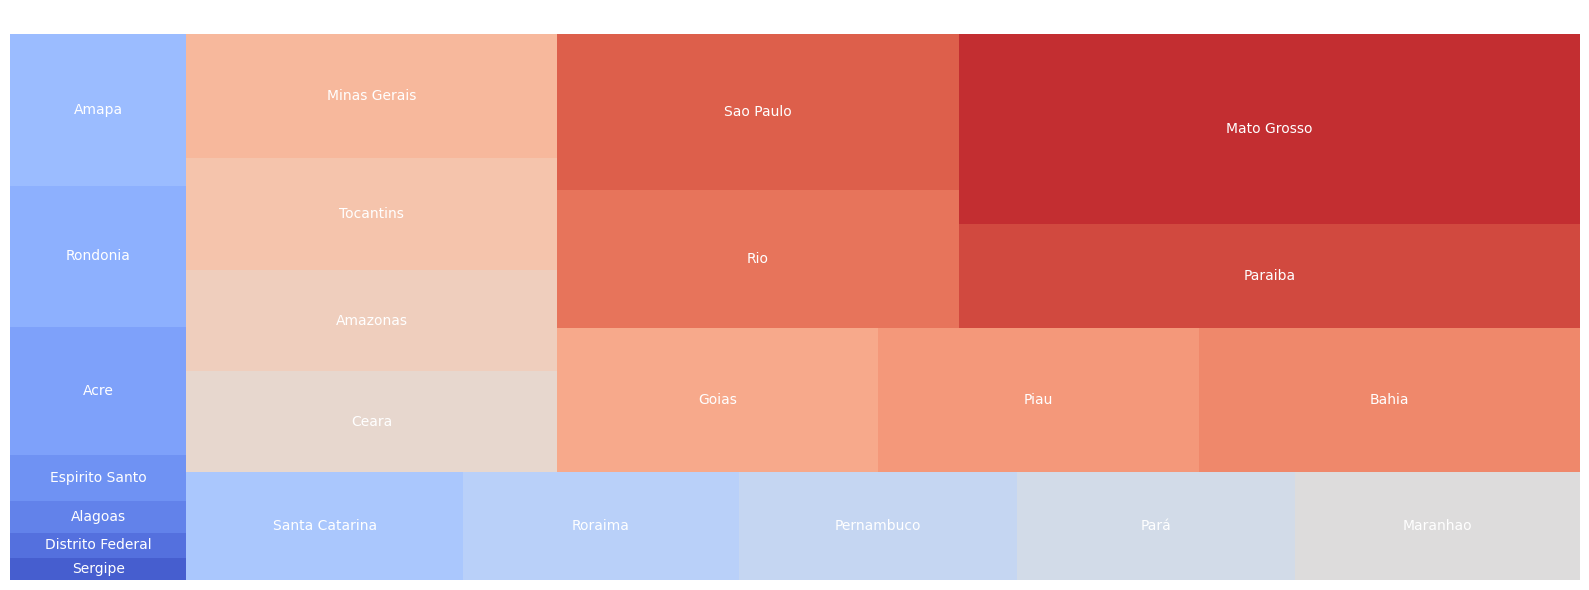

In [ ]:
import squarify

Analise_03 = Base_Dados.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=True ) #Aqui true/false só mudam as posições dos estados no gráfico
Analise_03.head()

plt.figure(figsize=(16, 6))
plt.title('A Proporção de Incêndios por Estado:', loc='left', fontsize=14)
squarify.plot(sizes=Analise_03['number'], label=Analise_03.state, color=sns.color_palette('coolwarm', len(Analise_03)))

plt.axis('off')
plt.tight_layout()
plt.show()

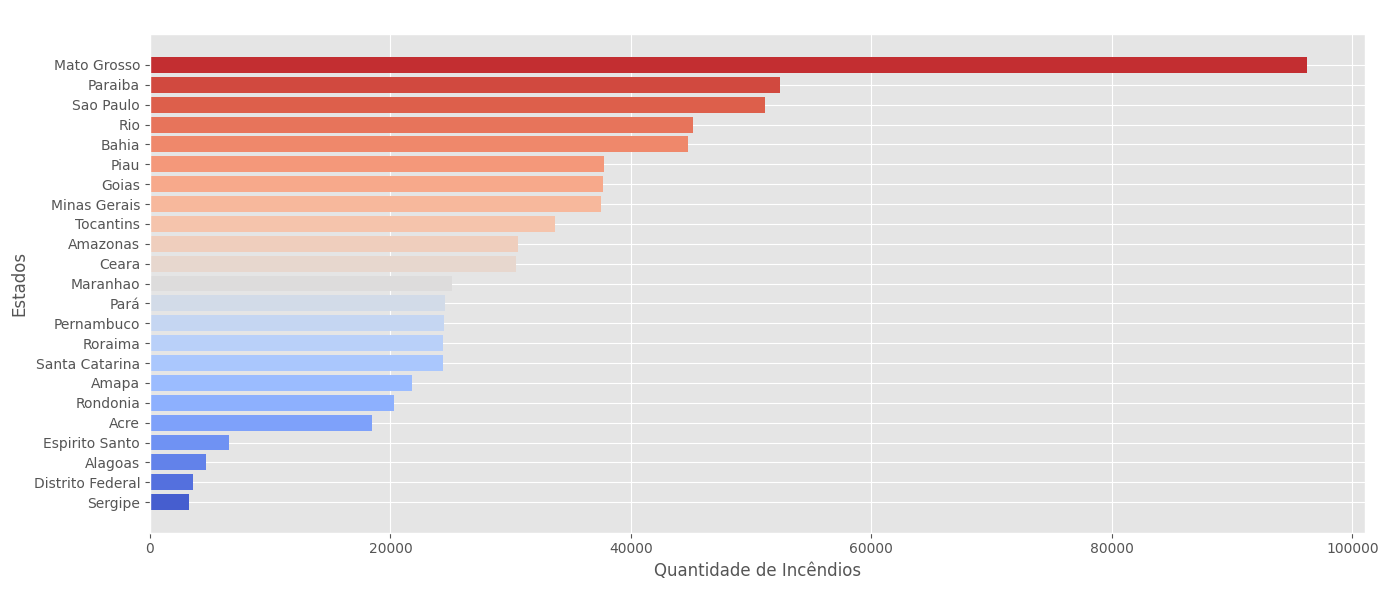

In [ ]:
Analise_03 = Base_Dados.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=True )
Analise_03.head()

plt.figure(figsize=(14, 6))

plt.title('A Proporção de Incêndios por Estado:', loc='left', fontsize=13.5)
plt.barh(Analise_03.state, Analise_03['number'], color=sns.color_palette('coolwarm', len(Analise_03)))


plt.xlabel('Quantidade de Incêndios')
plt.ylabel('Estados')
plt.tight_layout()
plt.show()

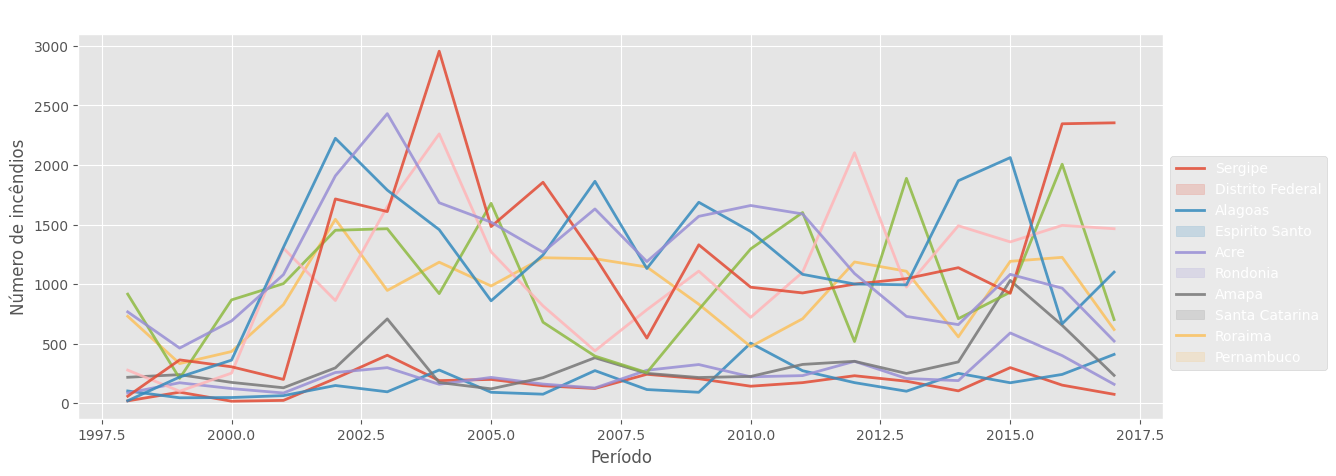

In [ ]:
Lista_TOP10 = Analise_03['state'][0:10].values

plt.figure( figsize=(14, 5) )
plt.title( 'Top 10 Estados com incêncios:', loc='left', fontsize=14 )

for Coluna in Lista_TOP10:
  Filtro = Base_Dados.loc[ Base_Dados['state'] == Coluna ]
  Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()
  sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

plt.xlabel('Período')
plt.ylabel('Número de incêndios')
plt.legend( Lista_TOP10, bbox_to_anchor=(1, 0.7) );

In [ ]:
#Plot Geográfico
Estados = Analise_03.sort_values('state')['state'].values
Valores = Analise_03.sort_values('state')['number'].values

Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores}

Analise_Geografica = pd.DataFrame ( Dicionario )
Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [ ]:
import pandas as pd
import plotly.express as px

# Dados fictícios
data = {
    'Latitude': [-15.7801, -23.5505, -12.9714, -19.9167, -3.7319],
    'Longitude': [-47.9292, -46.6333, -38.5014, -43.9333, -38.5267],
    'Incêndios': [100, 200, 150, 300, 50]
}
Analise_Geografica = pd.DataFrame(data)

# Mapa de Calor Geográfico
fig = px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='open-street-map',
    title='Mapa de Calor de Incêndios no Brasil'
)

# Exibir o mapa
fig.show()

In [ ]:
data = {
    'Estado': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo',
               'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná',
               'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia',
               'Roraima'],
    'Latitude': [-8.77, -9.71, 1.41, -3.07, -12.96, -3.71, -15.83, -19.19, -16.64, -2.55, -12.64, -18.10,
                 -7.06, -5.53, -8.28, -25.28, -8.28, -22.84, -11.22, 1.89, -27.33, -23.55, -10.90],
    'Longitude': [-70.55, -35.73, -51.77, -61.66, -38.51, -38.54, -47.86, -40.34, -49.31, -44.30, -55.42, -44.38,
                  -35.55, -52.29, -35.07, -49.44, -43.68, -43.15, -62.80, -61.22, -49.44, -46.64, -37.07],
}

coordenadas_estados = pd.DataFrame(data)
coordenadas_estados['Incêndios'] = [10000, 2000, 1500, 30000, 12000, 9000, 500, 7000, 15000, 11000, 25000, 18000,
                                    22000, 17000, 8000, 21000, 13000, 12000, 9000, 5000, 20000, 4000, 1000]

fig = px.density_mapbox(
    coordenadas_estados,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=4.2,
    mapbox_style='carto-positron',
    title='Mapa de Calor de Incêndios no Brasil'
)

fig.update_layout(
    width=1250,  # Aumenta a largura
    height=760,  # Aumenta a altura
    margin=dict(l=1, r=1, t=50, b=0),  # Remove margens extras
)

fig.show()